In [1]:
import pandas as pd
import PIL.Image
import numpy as np


def get_datas():
    #读取attr表格
    attrs = pd.read_csv('../datas/celeba/attrs.csv', sep=',')
    attrs = attrs[(attrs['Eyeglasses'] == 1) & (attrs['Male'] == 1)]

    datas = np.empty((len(attrs), 128, 128, 3), dtype=np.float32)
    for i in range(len(attrs)):
        image = attrs.iloc[i]['filename']
        image = PIL.Image.open('../datas/celeba/images/' + image)
        image = image.resize((128, 128))

        image = np.array(image, dtype=np.float32) / 255.0
        datas[i] = image

    return datas


datas = get_datas()

datas.shape

(10478, 128, 128, 3)

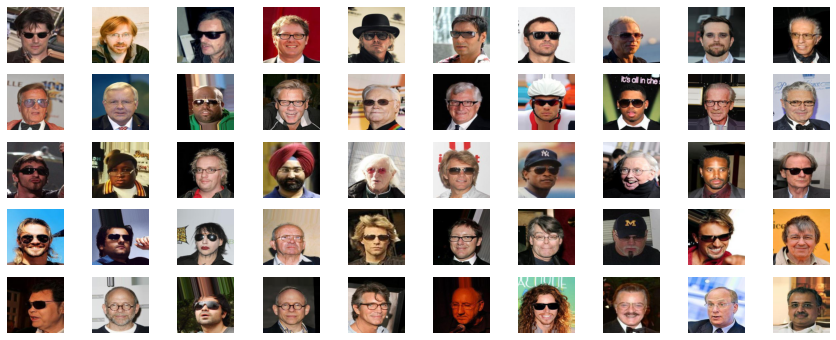

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


def show(images):
    plt.figure(figsize=(15, 6))

    for i in range(len(images)):
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.show()


show(datas[:50])

In [3]:
import keras

def get_model():
    encoder = keras.models.Sequential([
        keras.layers.Conv2D(filters=32,
                            kernel_size=3,
                            strides=2,
                            padding='same',
                            input_shape=(128, 128, 3)),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            strides=2,
                            padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            strides=2,
                            padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Conv2D(filters=64,
                            kernel_size=3,
                            strides=2,
                            padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Flatten(),
    ])

    decoder = keras.models.Sequential([
        keras.layers.Dense(8 * 8 * 64),
        keras.layers.Reshape((8, 8, 64)),
        keras.layers.Conv2DTranspose(filters=64,
                                     kernel_size=3,
                                     strides=2,
                                     padding='same',
                                     input_shape=(200, )),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Conv2DTranspose(filters=64,
                                     kernel_size=3,
                                     strides=2,
                                     padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Conv2DTranspose(filters=32,
                                     kernel_size=3,
                                     strides=2,
                                     padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Conv2DTranspose(filters=3,
                                     kernel_size=3,
                                     strides=2,
                                     padding='same'),
        keras.layers.Activation('sigmoid'),
    ])

    input = keras.layers.Input(shape=(128, 128, 3))

    hidden = encoder(input)

    #两个全连接层
    hidden_mu = keras.layers.Dense(200)(hidden)
    hidden_log_var = keras.layers.Dense(200)(hidden)

    #采样层,本身没有参数
    def f(args):
        mu, log_var = args
        epsilon = keras.backend.random_normal(shape=keras.backend.shape(mu),
                                              mean=0.,
                                              stddev=1.)
        return mu + keras.backend.exp(log_var / 2) * epsilon

    hidden = keras.layers.Lambda(f)([hidden_mu, hidden_log_var])

    output = decoder(hidden)

    model = keras.models.Model(input, output)

    return model, hidden_mu, hidden_log_var


model, hidden_mu, hidden_log_var = get_model()

model, hidden_mu, hidden_log_var

Using TensorFlow backend.








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


(<keras.engine.training.Model at 0x7fda70096358>,
 <tf.Tensor 'dense_2/BiasAdd:0' shape=(?, 200) dtype=float32>,
 <tf.Tensor 'dense_3/BiasAdd:0' shape=(?, 200) dtype=float32>)


Epoch 1/10
   32/10478 [..............................] - ETA: 10:26 - loss: 1438.93430


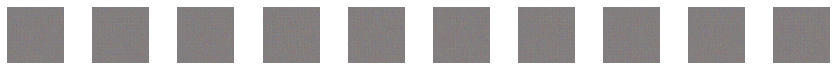

10478/10478 [==============================] - 90s 9ms/step - loss: 539.7263
Epoch 2/10
   32/10478 [..............................] - ETA: 1:27 - loss: 390.05520


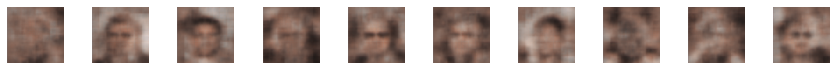

10478/10478 [==============================] - 88s 8ms/step - loss: 366.6369
Epoch 3/10
   32/10478 [..............................] - ETA: 1:28 - loss: 320.45360


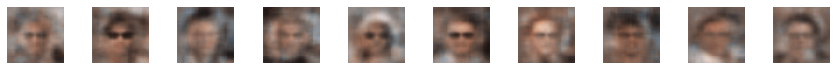

/root/anaconda3/envs/gdl/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.337667). Check your callbacks.
  % delta_t_median)


10478/10478 [==============================] - 89s 8ms/step - loss: 324.2428
Epoch 4/10
   32/10478 [..............................] - ETA: 1:33 - loss: 309.21510


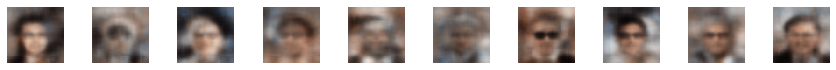

10478/10478 [==============================] - 88s 8ms/step - loss: 301.1929
Epoch 5/10
   32/10478 [..............................] - ETA: 1:30 - loss: 322.73530


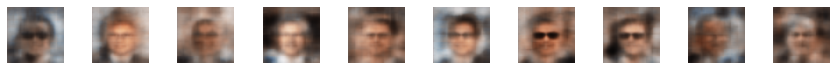

10478/10478 [==============================] - 90s 9ms/step - loss: 288.3670
Epoch 6/10
   32/10478 [..............................] - ETA: 1:32 - loss: 300.94560


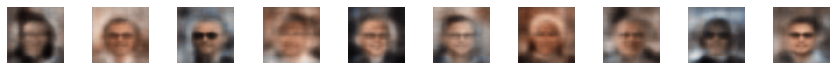

10478/10478 [==============================] - 92s 9ms/step - loss: 278.6434
Epoch 7/10
   32/10478 [..............................] - ETA: 1:27 - loss: 325.88190


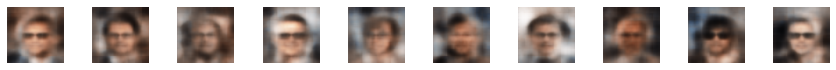

10478/10478 [==============================] - 96s 9ms/step - loss: 270.4286
Epoch 8/10
   32/10478 [..............................] - ETA: 1:38 - loss: 264.99680


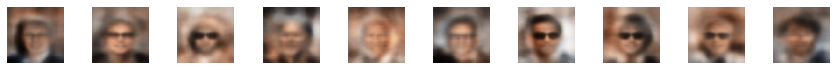

10478/10478 [==============================] - 88s 8ms/step - loss: 266.6466
Epoch 9/10
   32/10478 [..............................] - ETA: 1:27 - loss: 252.94470


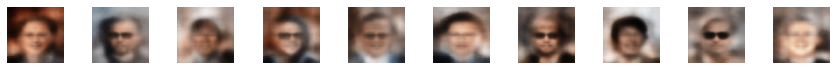

10478/10478 [==============================] - 88s 8ms/step - loss: 262.0370
Epoch 10/10
   32/10478 [..............................] - ETA: 1:30 - loss: 278.07980


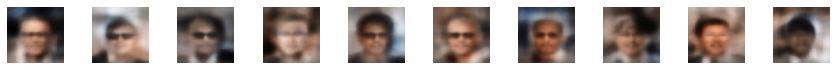

10478/10478 [==============================] - 88s 8ms/step - loss: 258.3677


In [4]:
def get_loss(y_true, y_pred):
    loss_r = keras.backend.mean(keras.backend.square(y_true - y_pred),
                                axis=[1, 2, 3]) * 1e4
    loss_kl = -0.5 * keras.backend.sum(
        1 + hidden_log_var - keras.backend.square(hidden_mu) -
        keras.backend.exp(hidden_log_var),
        axis=1)

    return loss_r + loss_kl


model.compile(optimizer=keras.optimizers.Adam(lr=5e-4), loss=get_loss)


#lr decay,实际上没有使用
def step_decay_schedule(epoch):
    return 5e-4


#在训练过程中打印预测图片
class CustomCallback(keras.callbacks.Callback):

    def on_batch_end(self, batch, logs):
        if batch % 1000 == 0:
            print(batch)
            pred = model.layers[-1].predict(np.random.randn(10, 200))
            show(pred)


model.fit(datas,
          datas,
          batch_size=32,
          epochs=10,
          callbacks=[
              keras.callbacks.LearningRateScheduler(step_decay_schedule),
              CustomCallback()
          ])

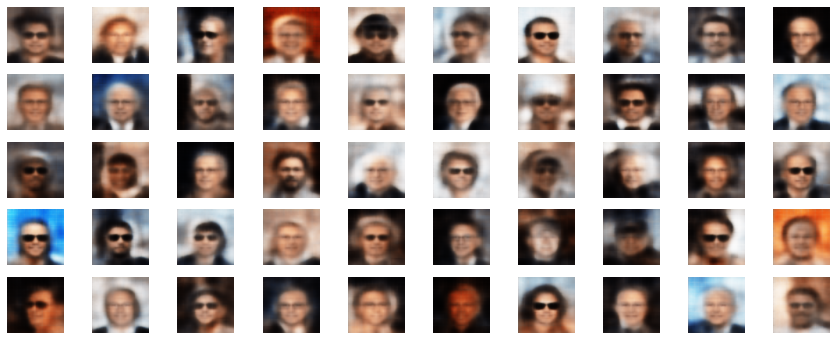

In [5]:
#重建
pred = model.predict(datas[:50])

show(pred)

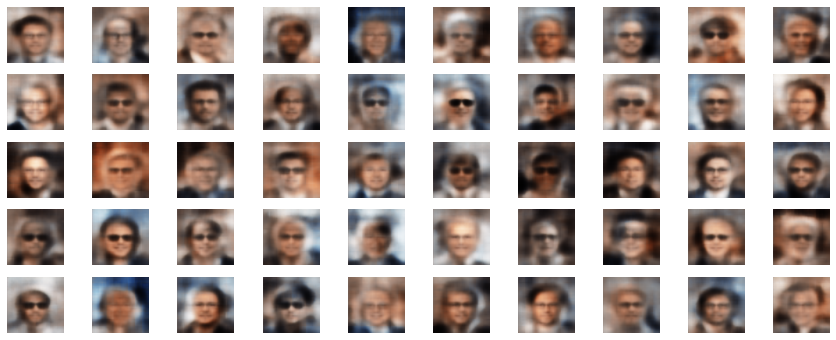

In [6]:
#生成
pred = model.layers[-1].predict(np.random.randn(50, 200))

show(pred)